In [38]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from d2l import torch as d2l
from torch.utils.data import dataset,DataLoader
from torch import nn

# 生成时间序列数据

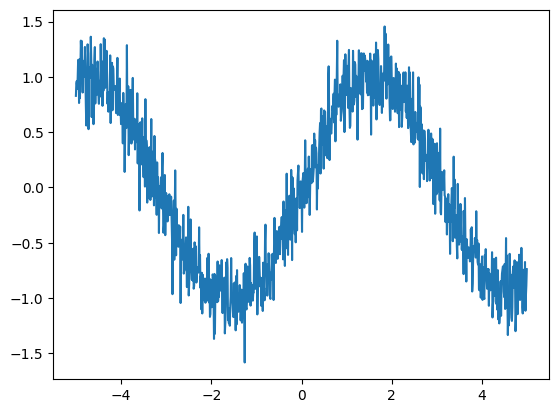

In [26]:
t = torch.arange(-5,5,0.01)
y = torch.sin(t)+torch.normal(0,0.2,t.size())

plt.figure()
plt.plot(t,y)
plt.show()

# 转化为自回归数据

In [36]:
tau = 4
T = t.size(axis = 0)
feature = torch.zeros((T - tau,tau))
for i in range(tau):
    feature[:,i] = y[i:T-tau+i]
label = y[tau:].reshape((-1,1))
n_train = 600
batch_size = 16
data = torch.utils.data.TensorDataset(feature[:n_train],label[:n_train])
train_iter = DataLoader(data,batch_size=batch_size,shuffle=True)

# 搭建网络

In [52]:
def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
    
def get_net():
    net = nn.Sequential(nn.Linear(4,10),
                         nn.ReLU(),
                         nn.Linear(10,1)).apply(init_weight)
    return net

loss = nn.MSELoss(reduction='none')
net = get_net()

# 训练网络

In [54]:
def train(net,train_iter,loss,num_epochs,lr):
    trainer = torch.optim.Adam(net.parameters(),lr)
    for epoch in range(num_epochs):
        for X,y in train_iter:
            trainer.zero_grad()
            y_hat = net(X)
            l = loss(y,y_hat)
            l.sum().backward()
            trainer.step()
        print(f'epoch{epoch + 1}')
        print(f'loss:{d2l.evaluate_loss(net,train_iter,loss):f}')
train(net,train_iter,loss,7,0.1)

epoch1
loss:0.052510
epoch2
loss:0.054347
epoch3
loss:0.059194
epoch4
loss:0.065829
epoch5
loss:0.052049
epoch6
loss:0.061242
epoch7
loss:0.053073


# 预测结果

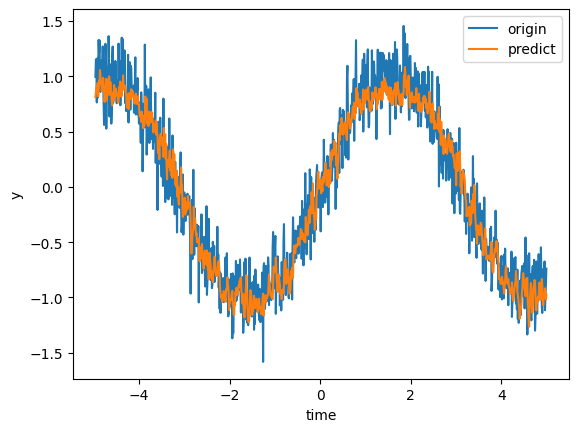

In [65]:
one_pred = net(feature)

plt.figure()
plt.plot(t[tau:],y[tau:].detach().numpy(),label='origin')
plt.plot(t[tau:],one_pred.detach().numpy(),label='predict')
plt.xlabel('time')
plt.ylabel('y')
plt.legend()

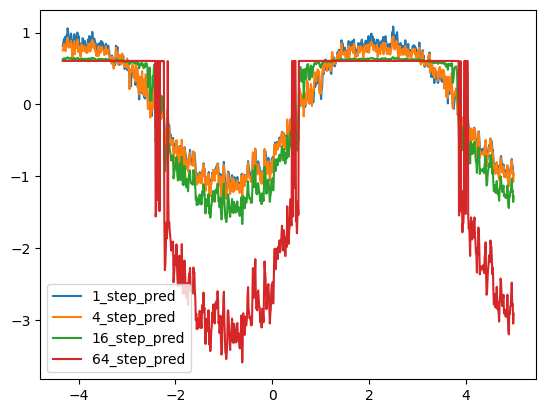

In [70]:
max_steps = 64

feature = torch.zeros(T-tau-max_steps+1,tau+max_steps)

for i in range(tau):
    feature[:,i] = y[i:T+i-tau-max_steps+1]

for i in range(max_steps):
    feature[:,tau+i] = net(feature[:,i:i+tau]).reshape(-1)

step = (1,4,16,64)

plt.figure()
for i in step:
    plt.plot(t[tau+max_steps-1:T],feature[:,tau+i-1].detach().numpy(),label=f'{i}_step_pred')
plt.legend()
plt.show()